#  [Correlation in Python](http://www.youtube.com/watch?v=iPYVYBtUTyE&list=PLUaB-1hjhk8H48Pj32z4GZgGWyylqv85f&index=4)

# **ASK:**[[](http://)](http://) Which variables are correlated to the gross revenue?
* H1: Budget variable is correlated to the gross revenue.
* H2: Company variable (size of a company) is correlated to the gross revenue.

# **PREPARE**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [ ]:
df = pd.read_csv("/content/movies.csv")
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


# **PROCESS**

## Check for missing values

In [ ]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


## Check for data types

In [ ]:
df.dtypes

name         object
rating       object
genre        object
year         object
released     object
score       float64
votes        object
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

## Convert data type

In [ ]:
df = df.dropna()

In [ ]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [ ]:
# with NA values below codes raisis an error
df["budget"] = df["budget"].astype("int64")
df["gross"] = df["gross"].astype("int64")

In [ ]:
df.dtypes

name         object
rating       object
genre        object
year         object
released     object
score       float64
votes        object
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

In [ ]:
## Create correct year column

df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)

In [ ]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9374,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0,2020
9375,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0,2020
9376,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101.0,2020
9377,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0,2020


## Order the dataframe

In [ ]:
df.sort_values(by=["gross"], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
9171,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2009,"January 15, 2015 (Sweden)",5.8,3500.0,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5073,Two Prong Lesson,96.0,2015
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900.0,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97.0,1994
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000.0,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108.0,2001
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300.0,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85.0,1982


## Display full data frame

In [ ]:
# pd.set_option("display.max_rows", None)

In [ ]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9374,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0,2020
9375,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0,2020
9376,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101.0,2020
9377,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0,2020


# Remove duplicates

In [ ]:
# Display unique values in column

df["company"].drop_duplicates().sort_values(ascending=False)

7129                                thefyzz
5664                            micro_scope
4007                               i5 Films
6793                             i am OTHER
6420                                   erbp
                       ...                 
385                        1818 Productions
2929                          1492 Pictures
3024                        .406 Production
7525    "Weathering With You" Film Partners
4345        "DIA" Productions GmbH & Co. KG
Name: company, Length: 1475, dtype: object

In [ ]:
df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0,2020
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0,2020
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101.0,2020
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0,2020


# **ANALYZE**

## Budget vs. Gross revenue (Matolotlib)

In [ ]:
df = df.sort_values(by=["gross"], inplace=False, ascending=False, ignore_index=True)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
1,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
2,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
4,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015


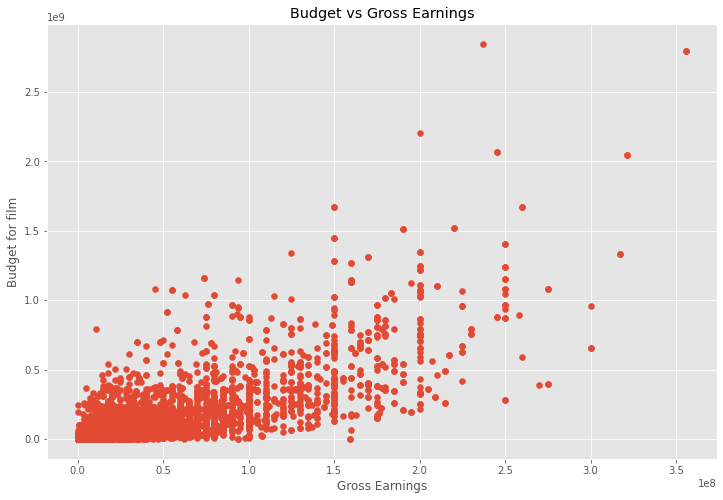

In [ ]:
plt.scatter(x=df["budget"], y=df["gross"])

plt.title("Budget vs Gross Earnings")

plt.xlabel("Gross Earnings")

plt.ylabel("Budget for film")

plt.show()

## Budget vs. Gross revenue (Seaborn)

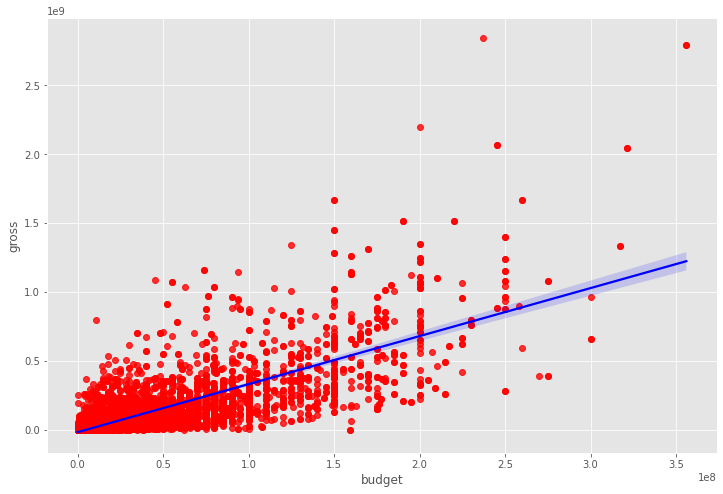

In [ ]:
sns.regplot(x="budget", y="gross", data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

## Calculate correlation

In [ ]:
# Pearson correlation by default
df.corr()

,score,budget,gross,runtime,yearcorrect
score,1.000000,0.091834,0.230280,0.417707,0.072460
budget,0.091834,1.000000,0.757608,0.335589,0.293096
gross,0.230280,0.757608,1.000000,0.288273,0.259662
runtime,0.417707,0.335589,0.288273,1.000000,0.087743
yearcorrect,0.072460,0.293096,0.259662,0.087743,1.000000


In [ ]:
# Kendall correlation
df.corr("kendall")

,score,budget,gross,runtime,yearcorrect
score,1.000000,0.004789,0.127420,0.293653,0.049847
budget,0.004789,1.000000,0.524086,0.239145,0.183039
gross,0.127420,0.524086,1.000000,0.182670,0.224732
runtime,0.293653,0.239145,0.182670,1.000000,0.080540
yearcorrect,0.049847,0.183039,0.224732,0.080540,1.000000


In [ ]:
# Spearman correlation
df.corr("spearman")

,score,budget,gross,runtime,yearcorrect
score,1.000000,0.006313,0.186866,0.414863,0.072873
budget,0.006313,1.000000,0.705642,0.341588,0.258522
gross,0.186866,0.705642,1.000000,0.265527,0.327992
runtime,0.414863,0.341588,0.265527,1.000000,0.118402
yearcorrect,0.072873,0.258522,0.327992,0.118402,1.000000


In [ ]:
correlation_matrix1 = df.corr(method="pearson")
correlation_matrix1

,score,budget,gross,runtime,yearcorrect
score,1.000000,0.091834,0.230280,0.417707,0.072460
budget,0.091834,1.000000,0.757608,0.335589,0.293096
gross,0.230280,0.757608,1.000000,0.288273,0.259662
runtime,0.417707,0.335589,0.288273,1.000000,0.087743
yearcorrect,0.072460,0.293096,0.259662,0.087743,1.000000


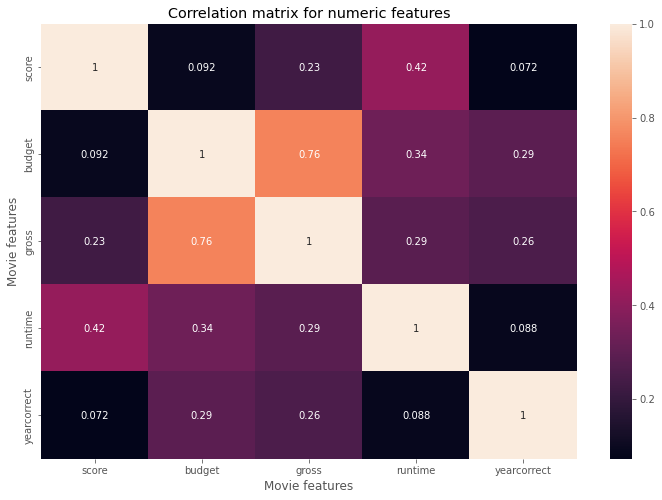

In [ ]:
sns.heatmap(correlation_matrix1, annot=True)

plt.title("Correlation matrix for numeric features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

## Company vs Gross Earnings

### Numeric represantation of company column

In [ ]:
df_numerized = df

for col_name in df_numerized.columns:
  if (df_numerized[col_name].dtype == "object"):
    df_numerized[col_name] = df_numerized[col_name].astype("category")
    df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,386,5,0,29,527,7.8,16,785,1263,1534,47,237000000,2847246203,1382,162.0,2009
1,388,5,0,39,137,8.4,676,105,513,1470,47,356000000,2797501328,983,181.0,2019
2,388,5,0,39,137,8.4,676,105,513,1470,47,356000000,2797501328,983,181.0,2019
3,4909,5,6,17,534,7.8,16,785,1263,1073,47,200000000,2201647264,1382,194.0,1997
4,3643,5,0,35,529,7.8,664,768,1806,356,47,245000000,2069521700,945,138.0,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6683,3794,6,6,29,890,5.8,308,585,2924,1498,47,3000000,5073,1385,96.0,2015
6684,2969,5,0,13,1467,4.5,115,1805,3102,186,47,5000000,2970,1376,97.0,1994
6685,1595,3,6,20,1721,6.8,393,952,1683,527,6,5000000,2554,466,108.0,2001
6686,2909,6,9,2,1525,3.9,168,261,55,1473,47,800000,2270,582,85.0,1982


In [ ]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,386,5,0,29,527,7.8,16,785,1263,1534,47,237000000,2847246203,1382,162.0,2009
1,388,5,0,39,137,8.4,676,105,513,1470,47,356000000,2797501328,983,181.0,2019
2,388,5,0,39,137,8.4,676,105,513,1470,47,356000000,2797501328,983,181.0,2019
3,4909,5,6,17,534,7.8,16,785,1263,1073,47,200000000,2201647264,1382,194.0,1997
4,3643,5,0,35,529,7.8,664,768,1806,356,47,245000000,2069521700,945,138.0,2015


In [ ]:
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,386,5,0,29,527,7.8,16,785,1263,1534,47,237000000,2847246203,1382,162.0,2009
1,388,5,0,39,137,8.4,676,105,513,1470,47,356000000,2797501328,983,181.0,2019
2,388,5,0,39,137,8.4,676,105,513,1470,47,356000000,2797501328,983,181.0,2019
3,4909,5,6,17,534,7.8,16,785,1263,1073,47,200000000,2201647264,1382,194.0,1997
4,3643,5,0,35,529,7.8,664,768,1806,356,47,245000000,2069521700,945,138.0,2015


## Calculate correlation

In [ ]:
correlation_matrix2 = df_numerized.corr(method="pearson")
correlation_matrix2

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
name,1.000000,-0.027024,0.018227,0.022531,-0.014898,0.005599,-0.019284,0.018432,0.013138,-0.006583,-0.029356,0.019948,-0.002151,0.021859,0.006848,0.022700
rating,-0.027024,1.000000,0.142839,0.023536,0.017324,0.052108,-0.008991,0.011029,-0.002607,0.009410,0.012866,-0.218576,-0.191442,-0.090968,0.133104,0.026095
genre,0.018227,0.142839,1.000000,-0.084048,0.021385,0.014990,-0.004762,0.003444,0.023810,0.002161,-0.006346,-0.394616,-0.260883,-0.077233,-0.081108,-0.079938
year,0.022531,0.023536,-0.084048,1.000000,-0.006071,0.067492,0.006119,-0.046565,-0.034199,-0.033367,-0.066342,0.299814,0.264902,-0.036741,0.087721,0.998940
released,-0.014898,0.017324,0.021385,-0.006071,1.000000,0.047031,0.003357,-0.003003,0.007523,0.021892,-0.014505,0.023745,0.010160,-0.003343,0.011471,-0.010379
score,0.005599,0.052108,0.014990,0.067492,0.047031,1.000000,0.000895,-0.004469,0.008464,-0.004854,-0.043053,0.091834,0.230280,0.024324,0.417707,0.072460
votes,-0.019284,-0.008991,-0.004762,0.006119,0.003357,0.000895,1.000000,0.002795,0.016547,0.005127,-0.011266,-0.009490,0.016477,0.008748,-0.005946,0.007056
director,0.018432,0.011029,0.003444,-0.046565,-0.003003,-0.004469,0.002795,1.000000,0.276017,0.035094,0.010832,-0.017621,-0.039850,-0.009077,0.007852,-0.045761
writer,0.013138,-0.002607,0.023810,-0.034199,0.007523,0.008464,0.016547,0.276017,1.000000,0.016821,0.020913,-0.054975,-0.050519,-0.010756,-0.026996,-0.033909
star,-0.006583,0.009410,0.002161,-0.033367,0.021892,-0.004854,0.005127,0.035094,0.016821,1.000000,-0.007382,-0.028070,-0.005426,0.016474,-0.001893,-0.033847


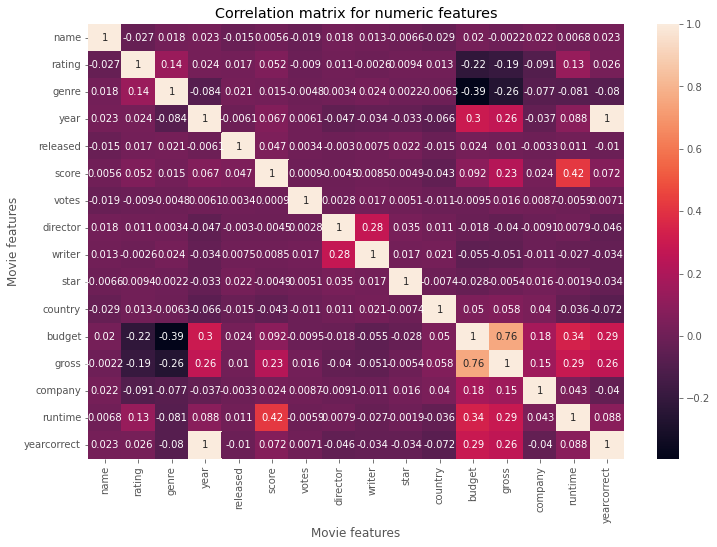

In [ ]:
sns.heatmap(correlation_matrix2, annot=True)

plt.title("Correlation matrix for numeric features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [ ]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
name,1.000000,-0.027024,0.018227,0.022531,-0.014898,0.005599,-0.019284,0.018432,0.013138,-0.006583,-0.029356,0.019948,-0.002151,0.021859,0.006848,0.022700
rating,-0.027024,1.000000,0.142839,0.023536,0.017324,0.052108,-0.008991,0.011029,-0.002607,0.009410,0.012866,-0.218576,-0.191442,-0.090968,0.133104,0.026095
genre,0.018227,0.142839,1.000000,-0.084048,0.021385,0.014990,-0.004762,0.003444,0.023810,0.002161,-0.006346,-0.394616,-0.260883,-0.077233,-0.081108,-0.079938
year,0.022531,0.023536,-0.084048,1.000000,-0.006071,0.067492,0.006119,-0.046565,-0.034199,-0.033367,-0.066342,0.299814,0.264902,-0.036741,0.087721,0.998940
released,-0.014898,0.017324,0.021385,-0.006071,1.000000,0.047031,0.003357,-0.003003,0.007523,0.021892,-0.014505,0.023745,0.010160,-0.003343,0.011471,-0.010379
score,0.005599,0.052108,0.014990,0.067492,0.047031,1.000000,0.000895,-0.004469,0.008464,-0.004854,-0.043053,0.091834,0.230280,0.024324,0.417707,0.072460
votes,-0.019284,-0.008991,-0.004762,0.006119,0.003357,0.000895,1.000000,0.002795,0.016547,0.005127,-0.011266,-0.009490,0.016477,0.008748,-0.005946,0.007056
director,0.018432,0.011029,0.003444,-0.046565,-0.003003,-0.004469,0.002795,1.000000,0.276017,0.035094,0.010832,-0.017621,-0.039850,-0.009077,0.007852,-0.045761
writer,0.013138,-0.002607,0.023810,-0.034199,0.007523,0.008464,0.016547,0.276017,1.000000,0.016821,0.020913,-0.054975,-0.050519,-0.010756,-0.026996,-0.033909
star,-0.006583,0.009410,0.002161,-0.033367,0.021892,-0.004854,0.005127,0.035094,0.016821,1.000000,-0.007382,-0.028070,-0.005426,0.016474,-0.001893,-0.033847


In [ ]:
correlation_matrix3 = df_numerized.corr()

corr_pairs = correlation_matrix3.unstack()

corr_pairs

name         name           1.000000
             rating        -0.027024
             genre          0.018227
             year           0.022531
             released      -0.014898
                              ...   
yearcorrect  budget         0.293096
             gross          0.259662
             company       -0.040443
             runtime        0.087743
             yearcorrect    1.000000
Length: 256, dtype: float64

In [ ]:
# Order corr_pairs

pd.set_option("display.max_rows", None)
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

genre        budget        -0.394616
budget       genre         -0.394616
genre        gross         -0.260883
gross        genre         -0.260883
budget       rating        -0.218576
rating       budget        -0.218576
gross        rating        -0.191442
rating       gross         -0.191442
company      rating        -0.090968
rating       company       -0.090968
genre        year          -0.084048
year         genre         -0.084048
runtime      genre         -0.081108
genre        runtime       -0.081108
yearcorrect  genre         -0.079938
genre        yearcorrect   -0.079938
company      genre         -0.077233
genre        company       -0.077233
country      yearcorrect   -0.072206
yearcorrect  country       -0.072206
country      year          -0.066342
year         country       -0.066342
writer       budget        -0.054975
budget       writer        -0.054975
writer       gross         -0.050519
gross        writer        -0.050519
director     year          -0.046565
y

In [ ]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

budget       gross          0.757608
gross        budget         0.757608
year         yearcorrect    0.998940
yearcorrect  year           0.998940
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

# FINDINGS
1. Hypotheses on budget and gross revenue are correlated is indeed discovered in analysis and has been accepted.

2. Hypotheses on company and gross revenue is correlated is rejected due to low correlation values found.

3. Instead, it has been discovered that votes and revenue are correlated.